In [187]:
import pandas as pd
import plotly.express as px
import datetime as dt

### CIS340 Final Austin Long
- [**Part 1**](#Part-1)  
- [**Part 2**](#Part-2)  
- [**Part 3**](#Part-3)  

### Part 1

In [188]:
df_employee = pd.read_excel("Data/w3schools_Data.xlsx", "Employees", skiprows=0)
df_order = pd.read_excel("Data/w3schools_Data.xlsx", "Orders", skiprows=0)
df_products = pd.read_excel("Data/w3schools_Data.xlsx", "Products", skiprows=2)
df_details = pd.read_excel("Data/w3schools_Data.xlsx", "OrderDetails", skiprows=2)

In [189]:
df_orders_join= pd.merge(df_order, df_employee, on='EmployeeID', how='left')
df_orders_join.head(2)

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,LastName,FirstName,BirthDate,Photo,Notes
0,10248,90,5,1996-07-04,3,Buchanan,Steven,20152,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...
1,10249,81,6,1996-07-05,1,Suyama,Michael,23194,EmpID6.pic,Michael is a graduate of Sussex University (MA...


In [190]:
df_products_join= pd.merge(df_products, df_details, on='ProductID', how='left')
df_products_join.head(2)

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price,OrderDetailID,OrderID,Quantity
0,1,Chais,1,1,10 boxes x 20 bags,18.0,100,10285,45
1,1,Chais,1,1,10 boxes x 20 bags,18.0,124,10294,18


In [191]:
df_joined= pd.merge(df_products_join, df_orders_join, on='OrderID', how='left')
df_joined.head(2)

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price,OrderDetailID,OrderID,Quantity,CustomerID,EmployeeID,OrderDate,ShipperID,LastName,FirstName,BirthDate,Photo,Notes
0,1,Chais,1,1,10 boxes x 20 bags,18.0,100,10285,45,63,1,1996-08-20,2,Davolio,Nancy,25180,EmpID1.pic,Education includes a BA in psychology from Col...
1,1,Chais,1,1,10 boxes x 20 bags,18.0,124,10294,18,65,4,1996-08-30,2,Peacock,Margaret,21447,EmpID4.pic,Margaret holds a BA in English literature from...


In [192]:
df_joined['Sales']= df_joined['Price']* df_joined['Quantity']
df_joined.head(5)

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price,OrderDetailID,OrderID,Quantity,CustomerID,EmployeeID,OrderDate,ShipperID,LastName,FirstName,BirthDate,Photo,Notes,Sales
0,1,Chais,1,1,10 boxes x 20 bags,18.0,100,10285,45,63,1,1996-08-20,2,Davolio,Nancy,25180,EmpID1.pic,Education includes a BA in psychology from Col...,810.0
1,1,Chais,1,1,10 boxes x 20 bags,18.0,124,10294,18,65,4,1996-08-30,2,Peacock,Margaret,21447,EmpID4.pic,Margaret holds a BA in English literature from...,324.0
2,1,Chais,1,1,10 boxes x 20 bags,18.0,185,10317,20,48,6,1996-09-30,1,Suyama,Michael,23194,EmpID6.pic,Michael is a graduate of Sussex University (MA...,360.0
3,1,Chais,1,1,10 boxes x 20 bags,18.0,270,10348,15,86,4,1996-11-07,2,Peacock,Margaret,21447,EmpID4.pic,Margaret holds a BA in English literature from...,270.0
4,1,Chais,1,1,10 boxes x 20 bags,18.0,283,10354,12,58,8,1996-11-14,3,Callahan,Laura,21194,EmpID8.pic,Laura received a BA in psychology from the Uni...,216.0


In [193]:
columns_to_keep = ['LastName', 'Sales']

df_sales = df_joined[columns_to_keep]

print(df_sales.shape)
df_sales

(518, 2)


,LastName,Sales
0,Davolio,810.0
1,Peacock,324.0
2,Suyama,360.0
3,Peacock,270.0
4,Callahan,216.0
...,...,...
513,Callahan,65.0
514,King,91.0
515,Callahan,182.0
516,Peacock,455.0


In [194]:
ser_sale = df_sales.groupby('LastName')['Sales'].sum()

print(ser_sale.shape)
ser_sale.head()

(9,)


LastName
Buchanan     27480.80
Callahan     39309.38
Davolio      57690.39
Dodsworth    15734.10
Fuller       32503.16
Name: Sales, dtype: float64

In [195]:
df_sale = ser_sale.to_frame()

df_sale

,Sales
LastName,
Buchanan,27480.80
Callahan,39309.38
Davolio,57690.39
Dodsworth,15734.10
Fuller,32503.16
King,39772.30
Leverling,42838.35
Peacock,105696.50
Suyama,25399.25


In [196]:
df_sale.reset_index(inplace=True)
df_sale.head()

,LastName,Sales
0,Buchanan,27480.80
1,Callahan,39309.38
2,Davolio,57690.39
3,Dodsworth,15734.10
4,Fuller,32503.16


In [197]:
df_sale_grouped = df_sale.sort_values(by='Sales', ascending=False, inplace=False)
df_sale_grouped

,LastName,Sales
7,Peacock,105696.50
2,Davolio,57690.39
6,Leverling,42838.35
5,King,39772.30
1,Callahan,39309.38
4,Fuller,32503.16
0,Buchanan,27480.80
8,Suyama,25399.25
3,Dodsworth,15734.10


In [198]:
df_top3 = df_sale_grouped.iloc[  : 3 ]

df_top3

,LastName,Sales
7,Peacock,105696.50
2,Davolio,57690.39
6,Leverling,42838.35


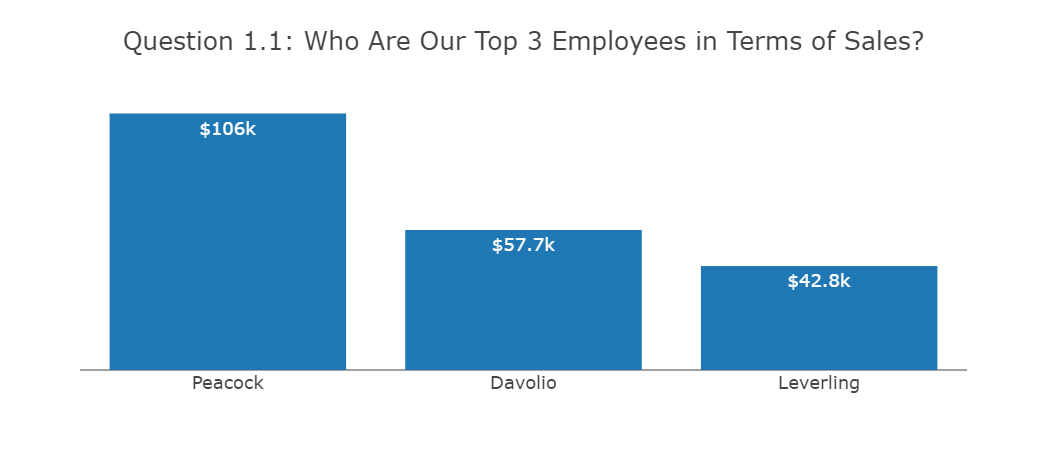

In [199]:
fig = px.bar(df_top3, 
             x='LastName',            
             y='Sales',
             text='Sales',
             template='presentation',
            title='Question 1.1: Who Are Our Top 3 Employees in Terms of Sales?')

fig.update_xaxes(showgrid=False,  
                 title_text='',  # Not showing an x axis label because it's clear that this is year
                 #tickformat='f0',
                 #tick0=0, 
                 dtick=1,
                 showticklabels=True,
                 showline=False,
                 zeroline=False
                )

# y axis
fig.update_yaxes(showgrid=False, 
                 title_text='',
                 tick0=0,      #NOTE:  This is not working as I would expect!
                 dtick=0,
                 #range=[0],
                 #tickformat='% {text:.1%}',
                 showticklabels=False,
                 #showline=False,
                 #zeroline=False
                 )

# Bar Labels
fig.update_traces(textposition='auto', 
                  texttemplate='%{text:$.3s}'
                 )

fig.show()

In [200]:
columns_to_keep1 = ['ProductName', 'Sales']

df_worst_products = df_joined[columns_to_keep1]

print(df_worst_products.shape)
df_worst_products

(518, 2)


,ProductName,Sales
0,Chais,810.0
1,Chais,324.0
2,Chais,360.0
3,Chais,270.0
4,Chais,216.0
...,...,...
513,Original Frankfurter grüne Soße,65.0
514,Original Frankfurter grüne Soße,91.0
515,Original Frankfurter grüne Soße,182.0
516,Original Frankfurter grüne Soße,455.0


In [201]:
ser_prod = df_worst_products.groupby('ProductName')['Sales'].sum()

print(ser_prod.shape)
ser_prod.head()

(77,)


ProductName
Alice Mutton         12909.0
Aniseed Syrup          800.0
Boston Crab Meat      4710.4
Camembert Pierrot    14620.0
Carnarvon Tigers      6625.0
Name: Sales, dtype: float64

In [202]:
df_prod = ser_prod.to_frame()

df_prod

,Sales
ProductName,
Alice Mutton,12909.00
Aniseed Syrup,800.00
Boston Crab Meat,4710.40
Camembert Pierrot,14620.00
Carnarvon Tigers,6625.00
...,...
Uncle Bob's Organic Dried Pears,750.00
Valkoinen suklaa,1137.50
Vegie-spread,9175.10


In [203]:
df_prod.reset_index(inplace=True)
df_prod.head()

,ProductName,Sales
0,Alice Mutton,12909.0
1,Aniseed Syrup,800.0
2,Boston Crab Meat,4710.4
3,Camembert Pierrot,14620.0
4,Carnarvon Tigers,6625.0


In [204]:
df_prod_grouped = df_prod.sort_values(by='Sales', ascending=True, inplace=False)
df_prod_grouped

,ProductName,Sales
32,Laughing Lumberjack Lager,70.00
56,Røgede sild,142.50
13,Filo Mix,336.00
25,Gustaf's Knäckebröd,378.00
16,Genen Shouyu,387.50
...,...,...
3,Camembert Pierrot,14620.00
66,Tarte au sucre,16022.50
51,Raclette Courdavault,19030.00
68,Thüringer Rostbratwurst,20796.72


In [205]:
df_worse5 = df_prod_grouped.iloc[  : 5 ]

df_worse5

,ProductName,Sales
32,Laughing Lumberjack Lager,70.0
56,Røgede sild,142.5
13,Filo Mix,336.0
25,Gustaf's Knäckebröd,378.0
16,Genen Shouyu,387.5


In [206]:
df_bot5 = df_worse5.sort_values(by='Sales', ascending=False, inplace=False)
df_bot5

,ProductName,Sales
16,Genen Shouyu,387.5
25,Gustaf's Knäckebröd,378.0
13,Filo Mix,336.0
56,Røgede sild,142.5
32,Laughing Lumberjack Lager,70.0


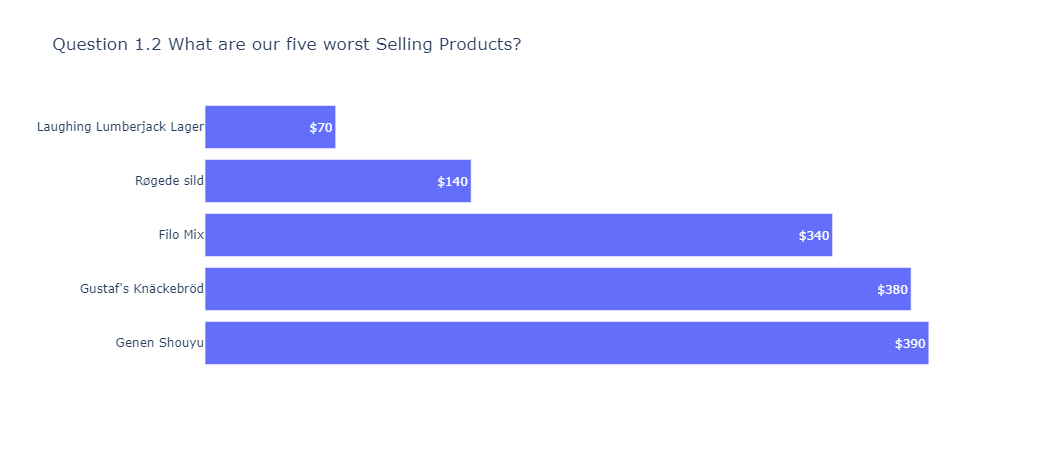

In [207]:
fig = px.bar(df_bot5,             
             x='Sales', 
             y='ProductName',
             text='Sales',
             template='plotly_white',
             orientation='h',
             title='Question 1.2 What are our five worst Selling Products?')

fig.update_traces(textposition='auto', 
                  #texttemplate='%{text:$,.1f}'    # This displays exact number with $ and commas
                  texttemplate='%{text:$.2s}'      # This displays two significant digits with $ 
                  #texttemplate='%{text:$.3s}'      # This displays three significant digits with $  
                 )
    
fig.update_xaxes(showgrid=False,  
                 title_text='',  # Not showing an x axis label because it's clear that this is year
                 #tickformat='f0',
                 #tick0=0, 
                 dtick=1,
                 showticklabels=False,
                 showline=False,
                 zeroline=False
                )

# y axis
fig.update_yaxes(showgrid=False, 
                 title_text='',
                 tick0=0,      #NOTE:  This is not working as I would expect!
                 dtick=0,
                 #range=[0],
                 #tickformat='% {text:.1%}',
                 showticklabels=True,
                 #showline=False,
                 #zeroline=False
                 )

fig.show()

In [208]:
df_joined['order_year'] = df_joined['OrderDate'].dt.strftime('%Y')
df_joined['order_month_name'] = df_joined['OrderDate'].dt.strftime('%b')
print(df_joined.shape)
df_joined.head()

(518, 21)


,ProductID,ProductName,SupplierID,CategoryID,Unit,Price,OrderDetailID,OrderID,Quantity,CustomerID,...,OrderDate,ShipperID,LastName,FirstName,BirthDate,Photo,Notes,Sales,order_year,order_month_name
0,1,Chais,1,1,10 boxes x 20 bags,18.0,100,10285,45,63,...,1996-08-20,2,Davolio,Nancy,25180,EmpID1.pic,Education includes a BA in psychology from Col...,810.0,1996,Aug
1,1,Chais,1,1,10 boxes x 20 bags,18.0,124,10294,18,65,...,1996-08-30,2,Peacock,Margaret,21447,EmpID4.pic,Margaret holds a BA in English literature from...,324.0,1996,Aug
2,1,Chais,1,1,10 boxes x 20 bags,18.0,185,10317,20,48,...,1996-09-30,1,Suyama,Michael,23194,EmpID6.pic,Michael is a graduate of Sussex University (MA...,360.0,1996,Sep
3,1,Chais,1,1,10 boxes x 20 bags,18.0,270,10348,15,86,...,1996-11-07,2,Peacock,Margaret,21447,EmpID4.pic,Margaret holds a BA in English literature from...,270.0,1996,Nov
4,1,Chais,1,1,10 boxes x 20 bags,18.0,283,10354,12,58,...,1996-11-14,3,Callahan,Laura,21194,EmpID8.pic,Laura received a BA in psychology from the Uni...,216.0,1996,Nov


In [209]:
columns_to_keep2 = ['OrderDate', 'Sales', 'order_year', 'order_month_name']

df_sales_date = df_joined[columns_to_keep2]

print(df_sales_date.shape)
df_sales_date

(518, 4)


,OrderDate,Sales,order_year,order_month_name
0,1996-08-20,810.0,1996,Aug
1,1996-08-30,324.0,1996,Aug
2,1996-09-30,360.0,1996,Sep
3,1996-11-07,270.0,1996,Nov
4,1996-11-14,216.0,1996,Nov
...,...,...,...,...
513,1996-11-28,65.0,1996,Nov
514,1996-11-28,91.0,1996,Nov
515,1996-12-31,182.0,1996,Dec
516,1997-01-16,455.0,1997,Jan


In [210]:
df_sales_year = df_sales_date.query("order_year == '1996' ")

print(df_sales_year.shape)
df_sales_year.head()

(405, 4)


,OrderDate,Sales,order_year,order_month_name
0,1996-08-20,810.0,1996,Aug
1,1996-08-30,324.0,1996,Aug
2,1996-09-30,360.0,1996,Sep
3,1996-11-07,270.0,1996,Nov
4,1996-11-14,216.0,1996,Nov


In [211]:
df_monthly = df_sales_year.resample('D', on='OrderDate').sum()


df_monthly.head(10)

,Sales
OrderDate,
1996-07-04,566.00
1996-07-05,2329.25
1996-07-06,0.00
1996-07-07,0.00
1996-07-08,3106.75
1996-07-09,4662.50
1996-07-10,1806.00
1996-07-11,781.50
1996-07-12,3115.75


In [212]:
df_monthly.reset_index(inplace=True)

print(df_monthly.shape)
df_monthly.head()

(181, 2)


,OrderDate,Sales
0,1996-07-04,566.00
1,1996-07-05,2329.25
2,1996-07-06,0.00
3,1996-07-07,0.00
4,1996-07-08,3106.75


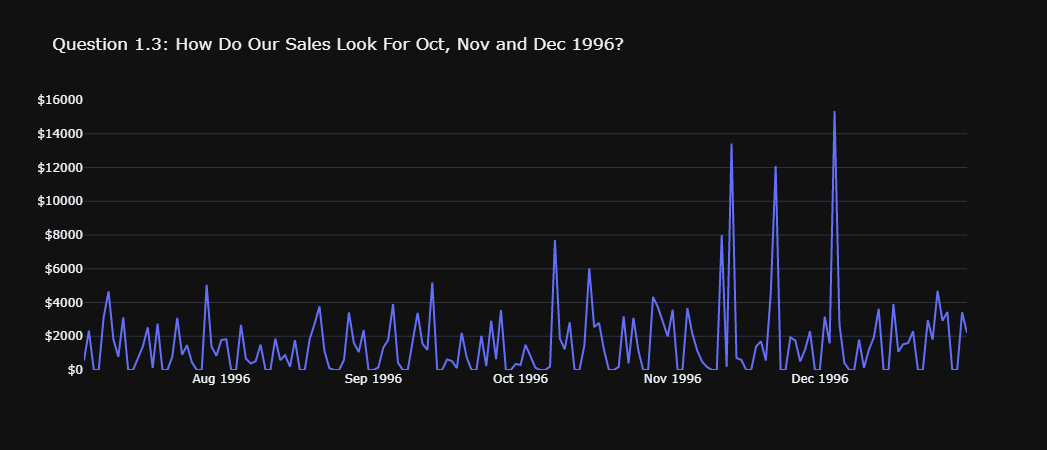

In [213]:
fig = px.line(df_monthly, 
              x='OrderDate', 
              y='Sales',
              template='plotly_dark',
              title='Question 1.3: How Do Our Sales Look For Oct, Nov and Dec 1996?')

# x axis
fig.update_xaxes(showgrid=False,  
                 title_text='',  
                 #tickformat='Q1',
                 #tick0=5, 
                 dtick=0,
                 #range=[1969, 1970],
                 showticklabels=True,
                 showline=False,
                 zeroline=False
                )

# y axis
fig.update_yaxes(showgrid=True, 
                 title_text='',
                 tick0=0,      #NOTE:  This is not working as I would expect!
                 dtick=2000,
                 range=[0, 16000],
                 tickformat='${text:.1}',
                 #showticklabels=True,
                 #showline=True,
                 zeroline=False
                 )



fig.show()

### Part 2

In [214]:
df_discount = pd.read_csv('Data/Sample-Superstore.csv')

print(df_discount.shape)
df_discount.head(2)

(9994, 21)


,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,...,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,0.16,Furniture,Henderson,United States,Claire Gute,0.0,1,11/8/2018,CA-2018-152156,42420.0,...,Bush Somerset Collection Bookcase,42.0,2,South,262.0,Consumer,11/11/2018,Second Class,Kentucky,Bookcases
1,0.30,Furniture,Henderson,United States,Claire Gute,0.0,1,11/8/2018,CA-2018-152156,42420.0,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",220.0,3,South,732.0,Consumer,11/11/2018,Second Class,Kentucky,Chairs


In [215]:
df_discount['Order Date'] = pd.to_datetime(df_discount['Order Date'])
df_discount['Sales'] = pd.to_numeric(df_discount['Sales']).astype(float)
df_discount['Profit'] = pd.to_numeric(df_discount['Profit']).astype(float)

In [216]:
df_discount['order_year_quarter'] = df_discount['Order Date'].dt.to_period("Q")

In [217]:
df_dis_g= df_discount.groupby("order_year_quarter")['Discount', 'Profit Ratio'].mean()
df_dis_g

<ipython-input-217-31cd3ca9e4af>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Discount,Profit Ratio
order_year_quarter,,
2016Q1,0.157447,0.117660
2016Q2,0.145459,0.155714
2016Q3,0.155089,0.128014
2016Q4,0.167642,0.092106
2017Q1,0.146000,0.145423
2017Q2,0.171622,0.087342
2017Q3,0.152061,0.118682
2017Q4,0.152494,0.124876
2018Q1,0.152000,0.116239


In [218]:
df_dis_g.reset_index(inplace=True)
df_dis_g

,order_year_quarter,Discount,Profit Ratio
0,2016Q1,0.157447,0.117660
1,2016Q2,0.145459,0.155714
2,2016Q3,0.155089,0.128014
3,2016Q4,0.167642,0.092106
4,2017Q1,0.146000,0.145423
5,2017Q2,0.171622,0.087342
6,2017Q3,0.152061,0.118682
7,2017Q4,0.152494,0.124876
8,2018Q1,0.152000,0.116239
9,2018Q2,0.160943,0.116684


In [219]:
df_q_tall = df_dis_g.melt(id_vars=['order_year_quarter'],
                                        var_name='Measure Type',
                                        value_name='Measure Value',
                                       )


print(df_q_tall.shape)
df_q_tall.head()

(32, 3)


,order_year_quarter,Measure Type,Measure Value
0,2016Q1,Discount,0.157447
1,2016Q2,Discount,0.145459
2,2016Q3,Discount,0.155089
3,2016Q4,Discount,0.167642
4,2017Q1,Discount,0.146000


In [220]:
df_q_tall['order_year_quarter'] = (df_q_tall['order_year_quarter']).astype(str)

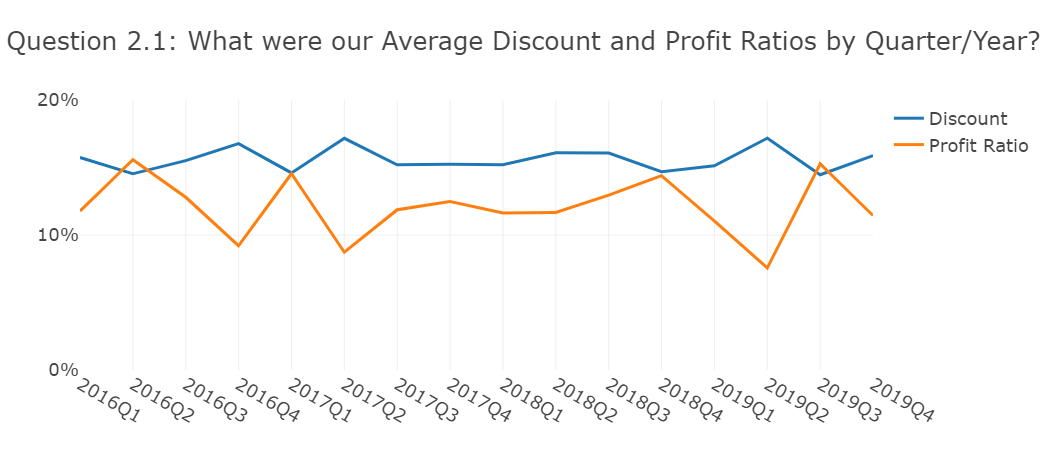

In [221]:
fig = px.line(df_q_tall, 
              x='order_year_quarter', 
              y='Measure Value',
              template='presentation',
              color='Measure Type',
              title='Question 2.1: What were our Average Discount and Profit Ratios by Quarter/Year?')

fig.update_xaxes(showgrid=True,  
                 title_text='',  # Not showing an x axis label because it's clear that this is year
                 #tickformat='f0',
                 #tick0=0, 
                 dtick=1,
                 showticklabels=True,
                 showline=False,
                 zeroline=False
                )

# y axis
fig.update_yaxes(#range=[0, 10]), 
                 title_text='',
                 tick0=0,      #NOTE:  This is not working as I would expect!
                 dtick=.1,
                 range=[0, .2],
                 tickformat='% {text:.1%}',
                 #showticklabels=True,
                 showline=False,
                 zeroline=False
                 )

# Bar Labels
fig.update_traces(texttemplate='%{text:.1%}' 
                 )

fig.update_layout(
    legend_title=""
    )

fig.show()

In [222]:
df_cols_keep = ['Order Date', 'Region', 'Sales', 'Profit', 'Profit Ratio',  'Segment', 'Discount', 'Ship Mode','Quantity']

df_day_ship = df_discount[df_cols_keep]

In [223]:
df_day_ship['Order Date'] = pd.to_datetime(df_day_ship['Order Date'])
df_day_ship.head()

<ipython-input-223-67913b1e33ee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order Date,Region,Sales,Profit,Profit Ratio,Segment,Discount,Ship Mode,Quantity
0,2018-11-08,South,262.0,42.0,0.16,Consumer,0.00,Second Class,2
1,2018-11-08,South,732.0,220.0,0.30,Consumer,0.00,Second Class,3
2,2018-06-12,West,15.0,7.0,0.47,Corporate,0.00,Second Class,2
3,2017-10-11,South,958.0,-383.0,-0.40,Consumer,0.45,Standard Class,5
4,2017-10-11,South,22.0,3.0,0.11,Consumer,0.20,Standard Class,2


In [224]:
df_day_ship['order_day'] = df_day_ship['Order Date'].dt.dayofweek
df_day_ship['order_day_name'] = df_day_ship['Order Date'].dt.strftime('%A')

<ipython-input-224-720d93f46267>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-224-720d93f46267>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [225]:
df_grouped_quantity= df_day_ship.groupby(['order_day','order_day_name','Ship Mode'])['Quantity'].sum()
df_total = df_grouped_quantity.to_frame()
df_total.reset_index(inplace=True)

In [226]:
df_total.sort_values(by='order_day', ascending=True, inplace=True)

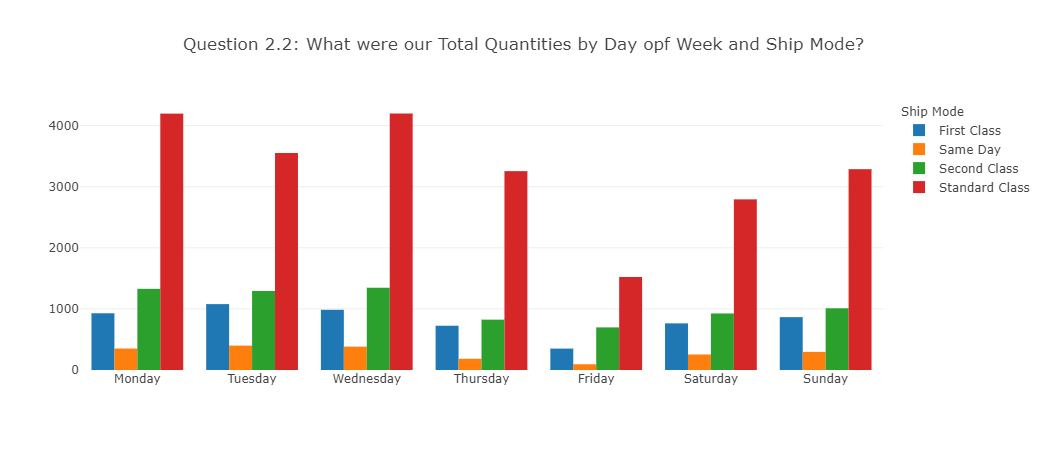

In [227]:
fig = px.bar(df_total, 
             x='order_day_name',            
             y='Quantity',
             color= 'Ship Mode',
             barmode = 'group',
             template='gridon',
            title='Question 2.2: What were our Total Quantities by Day opf Week and Ship Mode?')
fig.update_xaxes(showgrid=False,  
                 title_text='',  # Not showing an x axis label because it's clear that this is year
                 #tickformat='f0',
                 tick0=2016, 
                 dtick=1,
                 showticklabels=True,
                 showline=False,
                 zeroline=False
                )

# y axis
fig.update_yaxes(showgrid=True, 
                 title_text='',
                 tick0=0,
                 dtick=1000,
                 #tickformat='% {text:.1%}',
                 showticklabels=True,
                 showline=False,
                 zeroline=False
                 )

# Bar Labels
fig.update_layout(
    legend_title="Ship Mode"
    )
fig.show()

### Part 3

In [228]:
df_ticket = pd.read_csv('Data/Denver_Crime_2020.csv')

print(df_ticket.shape)
df_ticket.head(10)

(35063, 19)


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2.020600e+10,2.020000e+16,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/1/2020 0:00,1/2/2020 4:00,1/2/2020 16:34,1464 S KING CT,3131301.0,1676578.0,-105.033436,39.690081,4,421,mar-lee,1,0
1,2.020557e+07,2.020000e+13,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/1/2020 0:00,1/2/2020 8:00,1/3/2020 14:00,1001 S HAVANA ST,3178202.0,1679728.0,-104.866705,39.697949,3,321,windsor,1,0
2,2.020724e+08,2.020000e+14,2202,0,burglary-residence-by-force,burglary,1/1/2020 0:00,2/1/2020 21:38,2/1/2020 21:38,2035 S DEPEW ST,3124527.0,1672802.0,-105.057571,39.679808,4,421,harvey-park,1,0
3,2.020116e+09,2.020000e+15,2399,0,theft-other,larceny,1/1/2020 0:00,2/22/2020 0:00,2/22/2020 17:38,12374 E OLMSTED DR,3184385.0,1715974.0,-104.843802,39.797329,5,521,montbello,1,0
4,2.020122e+09,2.020000e+15,2203,0,burglary-business-by-force,burglary,1/1/2020 0:00,2/23/2020 0:00,2/25/2020 16:10,5500 W HAMPDEN AVE,3124945.0,1662809.0,-105.056260,39.652369,4,423,fort-logan,1,0
5,2.020193e+07,2.020000e+13,2202,0,burglary-residence-by-force,burglary,1/1/2020 0:00,1/1/2020 9:00,1/1/2020 20:07,1295 N RACE ST,3150784.0,1693630.0,-104.963849,39.736597,6,622,cheesman-park,1,0
6,2.020147e+08,2.020000e+14,1102,0,sex-aslt-rape,sexual-assault,1/1/2020 0:00,1/1/2020 23:59,1/7/2020 15:59,NaN,NaN,NaN,NaN,NaN,5,512,stapleton,1,0
7,2.020111e+09,2.020000e+15,2999,1,criminal-mischief-mtr-veh,public-disorder,1/1/2020 0:00,2/20/2020 15:25,2/20/2020 15:25,560 S LINCOLN ST,3144581.0,1682557.0,-104.986127,39.706298,3,312,washington-park-west,1,0
8,2.020574e+07,2.020000e+13,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,1/1/2020 0:00,1/3/2020 13:12,1/3/2020 13:12,900 BLOCK S WOLFF ST,3127054.0,1679908.0,-105.048468,39.699281,4,412,westwood,1,0
9,2.020500e+10,2.020000e+16,1102,1,sex-aslt-rape-pot,sexual-assault,1/1/2020 0:00,1/26/2020 23:59,1/27/2020 10:00,NaN,NaN,NaN,NaN,NaN,5,523,gateway-green-valley-ranch,1,0


In [229]:
columns_to_keep_traf = ['IS_TRAFFIC', 'NEIGHBORHOOD_ID']

df_traf = df_ticket[columns_to_keep_traf]

print(df_traf.shape)
df_traf

(35063, 2)


,IS_TRAFFIC,NEIGHBORHOOD_ID
0,0,mar-lee
1,0,windsor
2,0,harvey-park
3,0,montbello
4,0,fort-logan
...,...,...
35058,1,montbello
35059,0,civic-center
35060,0,stapleton
35061,0,civic-center


In [230]:
df_filter = df_traf.query("IS_TRAFFIC == '1' ")
print(df_filter.shape)
df_filter.head()

(6355, 2)


,IS_TRAFFIC,NEIGHBORHOOD_ID
27,1,auraria
30,1,baker
38,1,gateway-green-valley-ranch
47,1,westwood
49,1,northeast-park-hill


In [231]:
ser_count = df_filter.groupby("NEIGHBORHOOD_ID")['IS_TRAFFIC'].count()

ser_count

NEIGHBORHOOD_ID
athmar-park       84
auraria           61
baker            279
barnum            59
barnum-west       35
                ... 
west-colfax      102
west-highland     59
westwood         130
whittier          25
windsor           51
Name: IS_TRAFFIC, Length: 78, dtype: int64

In [232]:
df_count = ser_count.to_frame()

df_count

,IS_TRAFFIC
NEIGHBORHOOD_ID,
athmar-park,84
auraria,61
baker,279
barnum,59
barnum-west,35
...,...
west-colfax,102
west-highland,59
westwood,130


In [233]:
df_count.reset_index(inplace=True)
df_count.head()

,NEIGHBORHOOD_ID,IS_TRAFFIC
0,athmar-park,84
1,auraria,61
2,baker,279
3,barnum,59
4,barnum-west,35


In [234]:
df_count_grouped = df_count.sort_values(by='IS_TRAFFIC', ascending=False, inplace=False)
df_count_grouped

,NEIGHBORHOOD_ID,IS_TRAFFIC
59,stapleton,386
2,baker,279
32,hampden-south,226
25,five-points,224
40,lincoln-park,179
...,...,...
52,rosedale,19
21,country-club,16
39,kennedy,13
72,wellshire,10


In [235]:
df_top5_ticket = df_count_grouped.iloc[  : 5 ]

df_top5_ticket

,NEIGHBORHOOD_ID,IS_TRAFFIC
59,stapleton,386
2,baker,279
32,hampden-south,226
25,five-points,224
40,lincoln-park,179


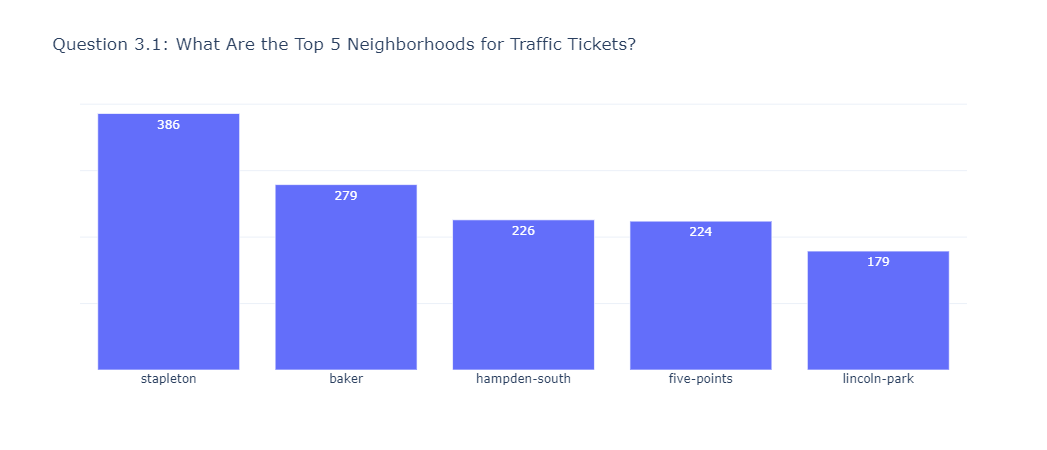

In [236]:
fig = px.bar(df_top5_ticket,             
             x='NEIGHBORHOOD_ID', 
             y='IS_TRAFFIC',
             text='IS_TRAFFIC',
             template='plotly_white',
             title='Question 3.1: What Are the Top 5 Neighborhoods for Traffic Tickets?')
            
fig.update_traces(textposition='auto', 
                  #texttemplate='%{text:$,.1f}'    # This displays exact number with $ and commas
                  #texttemplate='%{text:$.2s}'      # This displays two significant digits with $ 
                  #texttemplate='%{text:$.3s}'      # This displays three significant digits with $  
                 )
    
fig.update_xaxes(showgrid=False,  
                 title_text='',  # Not showing an x axis label because it's clear that this is year
                 #tickformat='f0',
                 #tick0=0, 
                 dtick=1,
                 showticklabels=True,
                 showline=False,
                 zeroline=False
                )

# y axis
fig.update_yaxes(#range=[0, 10]), 
                 title_text='',
                 #tick0=0,      #NOTE:  This is not working as I would expect!
                 #dtick=.05,
                 #range=[0, .13],
                 #tickformat='% {text:.1%}',
                 showticklabels=False,
                 showline=False,
                 zeroline=False
                 )

# Bar Labels
fig.update_traces(textposition='auto', 
                  #texttemplate='%{text:.1%}' 
                 )

fig.show()

In [237]:
columns_to_keep_burg = ['DISTRICT_ID', 'NEIGHBORHOOD_ID', 'OFFENSE_CATEGORY_ID']

df_burg = df_ticket[columns_to_keep_burg]

print(df_burg.shape)
df_burg

(35063, 3)


,DISTRICT_ID,NEIGHBORHOOD_ID,OFFENSE_CATEGORY_ID
0,4,mar-lee,theft-from-motor-vehicle
1,3,windsor,theft-from-motor-vehicle
2,4,harvey-park,burglary
3,5,montbello,larceny
4,4,fort-logan,burglary
...,...,...,...
35058,5,montbello,traffic-accident
35059,6,civic-center,public-disorder
35060,5,stapleton,auto-theft
35061,6,civic-center,other-crimes-against-persons


In [238]:
df_4 = df_burg.query("DISTRICT_ID == '4' ")

print(df_4.shape)
df_4.head()

(4655, 3)


,DISTRICT_ID,NEIGHBORHOOD_ID,OFFENSE_CATEGORY_ID
0,4,mar-lee,theft-from-motor-vehicle
2,4,harvey-park,burglary
4,4,fort-logan,burglary
8,4,westwood,theft-from-motor-vehicle
22,4,westwood,public-disorder


In [239]:
df_4_burg = df_4.query("OFFENSE_CATEGORY_ID == 'burglary' ")
print(df_4_burg.shape)
df_4_burg.head()

(231, 3)


,DISTRICT_ID,NEIGHBORHOOD_ID,OFFENSE_CATEGORY_ID
2,4,harvey-park,burglary
4,4,fort-logan,burglary
333,4,college-view-south-platte,burglary
1055,4,westwood,burglary
1061,4,barnum-west,burglary


In [240]:
ser_count_burg = df_4_burg.groupby("NEIGHBORHOOD_ID")['OFFENSE_CATEGORY_ID'].count()

ser_count_burg

NEIGHBORHOOD_ID
athmar-park                  17
barnum                       13
barnum-west                   5
bear-valley                  16
college-view-south-platte    29
fort-logan                   10
harvey-park                  24
harvey-park-south            22
mar-lee                      16
marston                      14
ruby-hill                    19
valverde                     11
westwood                     35
Name: OFFENSE_CATEGORY_ID, dtype: int64

In [241]:
df_count_burg = ser_count_burg.to_frame()

df_count_burg

,OFFENSE_CATEGORY_ID
NEIGHBORHOOD_ID,
athmar-park,17
barnum,13
barnum-west,5
bear-valley,16
college-view-south-platte,29
fort-logan,10
harvey-park,24
harvey-park-south,22
mar-lee,16


In [242]:
df_count_burg.reset_index(inplace=True)
df_count_burg.head()

,NEIGHBORHOOD_ID,OFFENSE_CATEGORY_ID
0,athmar-park,17
1,barnum,13
2,barnum-west,5
3,bear-valley,16
4,college-view-south-platte,29


In [243]:
df_burg_grouped = df_count_burg.sort_values(by='OFFENSE_CATEGORY_ID', ascending=True, inplace=False)
df_burg_grouped

,NEIGHBORHOOD_ID,OFFENSE_CATEGORY_ID
2,barnum-west,5
5,fort-logan,10
11,valverde,11
1,barnum,13
9,marston,14
3,bear-valley,16
8,mar-lee,16
0,athmar-park,17
10,ruby-hill,19
7,harvey-park-south,22


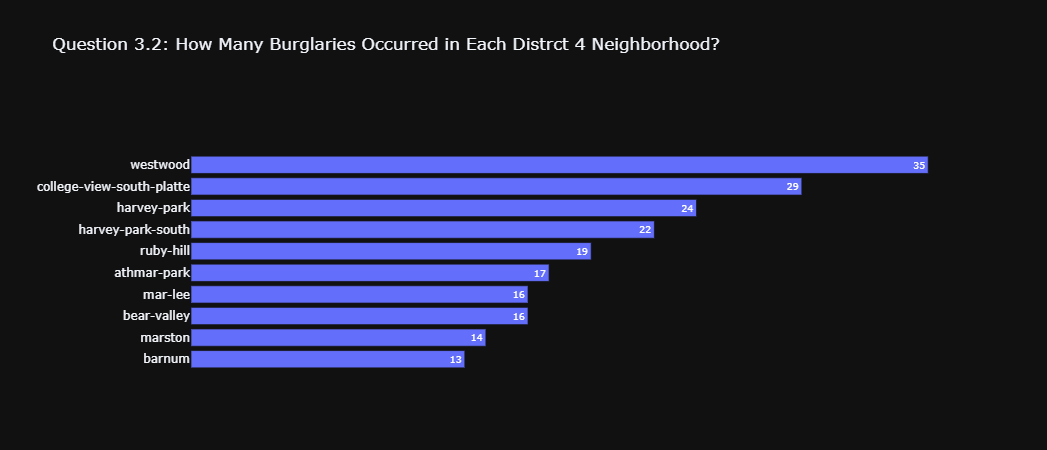

In [244]:
fig = px.bar(df_burg_grouped,             
             x='OFFENSE_CATEGORY_ID', 
             y='NEIGHBORHOOD_ID',
             text='OFFENSE_CATEGORY_ID',
             template='plotly_dark',
             orientation='h',
             title='Question 3.2: How Many Burglaries Occurred in Each Distrct 4 Neighborhood?')

fig.update_xaxes(showgrid=False,  
                 title_text='',  # Not showing an x axis label because it's clear that this is year
                 #tickformat='f0',
                 #tick0=0, 
                 dtick=1,
                 showticklabels=False,
                 showline=False,
                 zeroline=False
                )

# y axis
fig.update_yaxes(#range=[0, 10]), 
                 title_text='',
                 #tick0=0,      #NOTE:  This is not working as I would expect!
                 #dtick=.05,
                 range=[2.5, 15],
                 #tickformat='% {text:.1%}',
                 showticklabels=True,
                 showline=False,
                 zeroline=False
                 )

# Bar Labels
fig.update_traces(textposition='auto', 
                  #texttemplate='%{text:.1%}' 
                 )

fig.show()